<a href="https://colab.research.google.com/github/EndrekMatias/Sistema_de_recomendacion_Machine_Learning/blob/main/Sistema_recomendacion(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Último práctico para ICARO - Sistema de recomendación.

***Hipotesis y objetivo***

***El objetivo principal de nuestro trabajo es: desarrollar un sistema de recomendación que utilice las valoraciones previas de los usuarios en una variedad de productos para sugerirles nuevos artículos. El propósito principal es analizar las reseñas de dichos productos para obtener información útil y proporcionar recomendaciones personalizadas que mejoren la experiencia de compra, asignandole los mejores productos***

De manera inicial y por cuestiones de equipamiento, redujimos el data para poder procesarlo, para luego analizar:
**Productos:**
- Productos únicos
- Mejores productos (en base al rating)
- Revisiones de los producto por año

**Usuarios:**
- Historial de compra
- Usuarios únicos
- Cantidad de productos que compró cada usuario

**Temporalidad:**
- Detección de estacionalidad o cambios de preferencia dependiendo de cuando dejaron la reseña

**Relaciones**
- Compra - rating( por mes y por año)



***Se inicializa el proceso ETL de la base de datos disponible
para llevar adelante el proyecto.***

In [ ]:
# Se importan las librerías necesarias para leer el .CSV

import pandas as pd
df = pd.read_csv ("ratings_Electronics.csv")

In [ ]:
# Al visualizar el dataset nos encontramos con que las columnas no tienen nombres que tengan relación con lo que buscan interpretar.

df

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [ ]:
# modificamos los nombres de las columnas con nombres relacionados a lo que buscan interpretar los datos.

df.columns = ['userId', 'productId', 'Rating', 'timestamp']
df.head(10)

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [ ]:
# Este código toma la columna del DataFrame que contiene valores de
#  tiempo en formato de tiempo Unix (es decir, segundos desde la medianoche del 1 de enero de 1998)
#  y la convierte en objetos de tiempo de Python, lo que hace que sea más fácil trabajar con ellos en
#  análisis de datos o visualizaciones.

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [ ]:
# Corroboramos que los cambios le hayan aplicado correspondientemente.

df.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
1,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
2,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
3,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18
4,A1QGNMC6O1VW39,0511189877,5.0,2014-04-14


In [ ]:
# Se aplicó la función .info() al dataset para ver el tipo de datos asignado a cada columna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     object        
 1   productId  object        
 2   Rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.8+ MB


In [ ]:
# Corroboramos que el dataset no tenga valores nulos aplicandole las funciones .isna().sum()

df.isna().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

In [ ]:
# Visualizamos el valor mínimo de la columna timestamp
# para ver desde qué fecha hay registro de las operaciones.

df.timestamp.min()

Timestamp('1998-12-04 00:00:00')

In [ ]:
# Visualizamos el valor maximo  de la columna timestamp
# para ver hasta qué fecha hay registro de las operaciones.

df.timestamp.max()

Timestamp('2014-07-23 00:00:00')

In [ ]:
# Este código toma el  DataFrame que contiene registros de revisiones, extrae el año de cada revisión,
#  cuenta el número de revisiones para cada año y luego organiza estos datos en un nuevo
#  DataFrame llamado plot_df, que tiene dos columnas: "year" (año) y "reviews_count" (cantidad de revisiones en ese año).
#   Esto prepara los datos para su posterior visualización. Adecuada para representar
#   la cantidad de revisiones a lo largo del tiempo.

plot_df = df.copy()
plot_df["year"] = df['timestamp'].dt.year
plot_df = plot_df.groupby("year", as_index=False).count()[["year", "userId"]]
plot_df.columns = ["year", "reviews_count"]
plot_df

,year,reviews_count
0,1998,4
1,1999,1212
2,2000,9214
3,2001,14753
4,2002,18648
5,2003,23117
6,2004,31245
7,2005,56311
8,2006,86659
9,2007,193430


**Se comienza con el proceso de EDA (Exploratory Data Analysis)**

C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


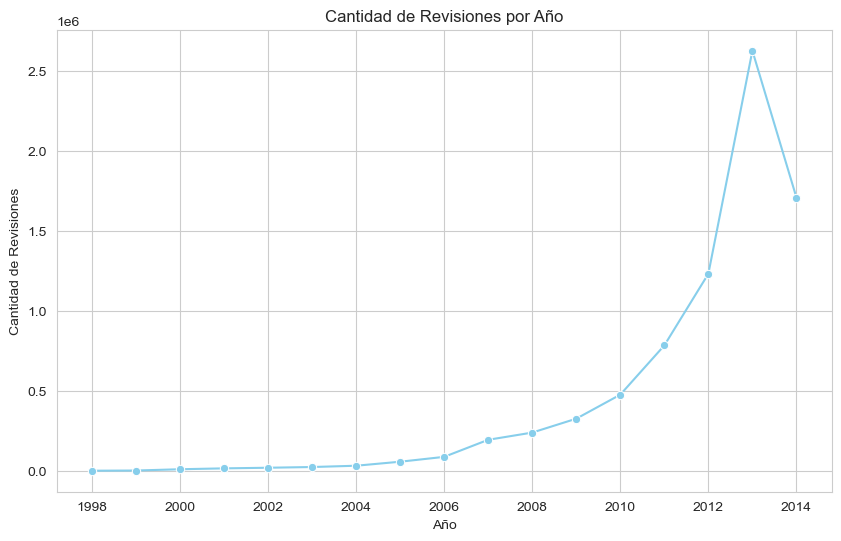

In [ ]:
# Se importan las librerías necesarias para visualizar el siguiente gráfico.

import seaborn as sns
import matplotlib.pyplot as plt

pd.option_context('mode.use_inf_as_na', True)


# Este código crea un gráfico de líneas utilizando Seaborn y Matplotlib para visualizar la cantidad de revisiones por año,
# con un fondo de cuadrícula blanca, marcadores circulares en los puntos de datos y un color de línea azul cielo.

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear el gráfico de línea utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='reviews_count', data=plot_df, marker='o', color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Revisiones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Revisiones')


# Mostrar el gráfico
plt.show()



***Descripción del gráfico:***

El gráfico muestra el número de revisiones de un producto por año. El eje X del gráfico está etiquetado como "Año" y va de 1998 a 2014. El eje Y del gráfico está etiquetado como "Cantidad de revisiones" y va de 0 a 1 millón (con notación científica). El título del gráfico es "Cantidad de revisiones por año".

La línea del gráfico muestra que la cantidad de revisiones por año ha aumentado generalmente con el tiempo. Hay algunos altibajos, pero la tendencia general es positiva. Por ejemplo, en 1998 solo hubo 41 revisiones, mientras que en 2014 hubo más de 1,7 millones de revisiones.

***Conclusiones del gráfico:***

La cantidad de revisiones por año ha aumentado significativamente desde 1998.
Esto podría deberse a una serie de factores, como un aumento en la cantidad de personas que usan el producto, un aumento en la cantidad de funciones del producto o un cambio en la forma en que se generan las revisiones.
También es posible que el aumento se deba a un cambio en la forma en que se recopilan los datos. Por ejemplo, si la empresa comenzó a recopilar datos de una gama más amplia de fuentes en 2005, esto podría explicar el aumento repentino en la cantidad de revisiones en ese año.
En general, el gráfico muestra una clara tendencia de aumento de revisiones a lo largo del tiempo. Esto sugiere que el producto se está volviendo más popular y/o que las personas tienen más probabilidades de dejar reseñas al respecto.

***Recomendaciones:***

Se podría realizar un análisis más profundo para determinar las causas del aumento en el número de revisiones.
Se podría analizar el contenido de las revisiones para identificar tendencias y patrones.
Se podría utilizar la información del gráfico para mejorar el producto o el servicio al cliente.

C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


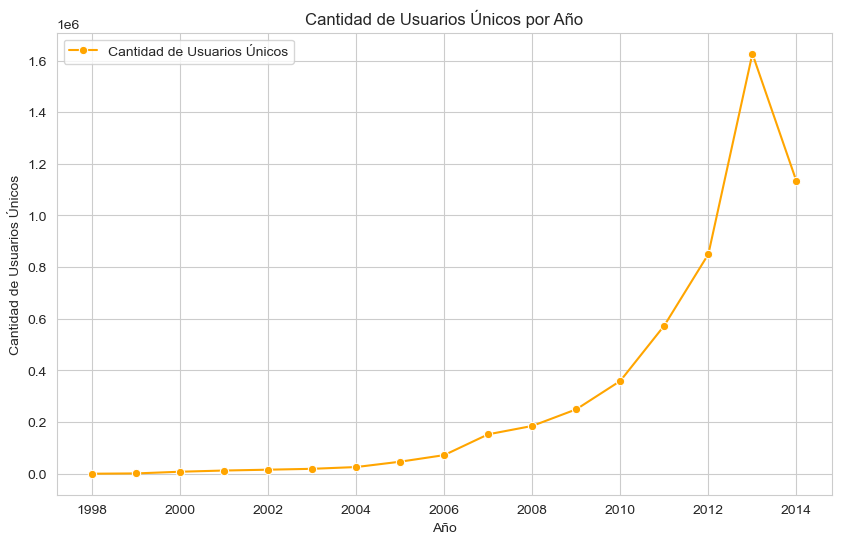

In [ ]:
# El siguiente código crea un gráfico de línea que muestra la cantidad de usuarios únicos por año,
# utilizando los datos de un DataFrame que contiene información de usuarios y sus timestamps.

pd.option_context('mode.use_inf_as_na', True)

# Crear una copia del DataFrame original
df_copy = df.copy()

# Crear una columna 'year' a partir de la columna 'timestamp' en la copia del DataFrame
df_copy['year'] = df_copy['timestamp'].dt.year

# Crear plot_df agrupando por 'year' y contando los usuarios únicos en la copia del DataFrame
plot_df = df_copy.groupby('year')['userId'].nunique().reset_index(name='unique_users')

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear el gráfico de línea para la cantidad de usuarios únicos por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='unique_users', data=plot_df, marker='o', color='orange', label='Cantidad de Usuarios Únicos')

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Usuarios Únicos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Usuarios Únicos')

# Mostrar el gráfico
plt.show()

***Descripción del gráfico***

El gráfico muestra la cantidad de usuarios únicos que han realizado una compra por año. El eje X representa el año y el eje Y representa la cantidad de usuarios únicos.

***Conclusiones***

El gráfico muestra que la cantidad de usuarios únicos ha aumentado constantemente desde 2006 hasta 2014 (hasta la fecha del dataset). El mayor aumento se produjo entre 2012 y 2014, cuando la cantidad de usuarios únicos se duplicó.

***Conclusiones adicionales***

Es posible que el aumento en la cantidad de usuarios únicos se deba a una mayor conciencia sobre el producto o servicio.
El aumento en la cantidad de usuarios únicos también podría deberse a una campaña de marketing exitosa.
Es importante analizar otros datos, como las ventas totales o el valor promedio de las compras, para obtener una comprensión más completa del rendimiento del negocio.

***Recomendaciones***

Se recomienda continuar monitoreando la cantidad de usuarios únicos para identificar tendencias.
También se recomienda realizar un análisis más profundo para determinar las causas del aumento en la cantidad de usuarios únicos.
Con base en el análisis, se pueden desarrollar estrategias para seguir aumentando la cantidad de usuarios únicos y las ventas.

***Consideraciones***

Es importante tener en cuenta que el gráfico solo muestra la cantidad de usuarios únicos que han realizado una compra. No muestra la cantidad total de usuarios que han utilizado el producto o servicio.
El gráfico tampoco muestra el valor promedio de las compras o las ventas totales.
Por lo tanto, el gráfico solo proporciona una visión parcial del rendimiento del negocio.

C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cami Arregui\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

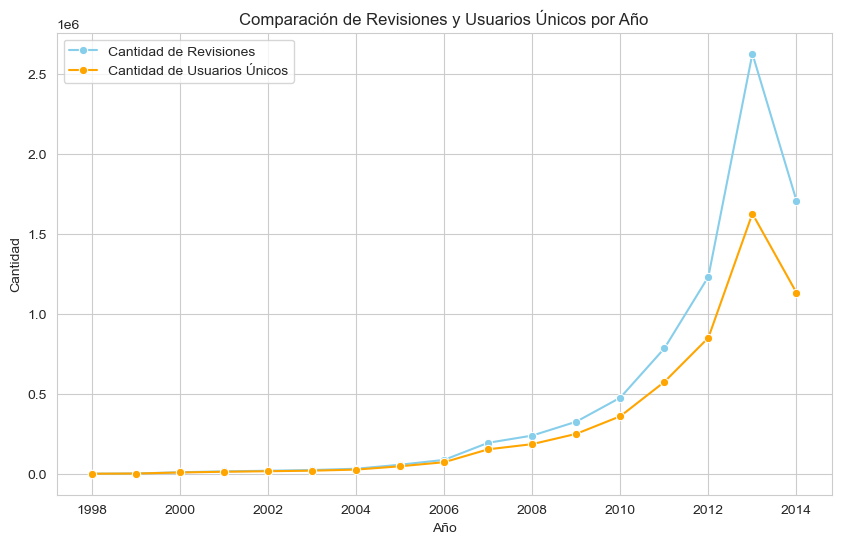

In [ ]:

# Crear una copia del DataFrame original
df_copy = df.copy()

# Crear una columna 'year' a partir de la columna 'timestamp' en la copia del DataFrame
df_copy['year'] = df_copy['timestamp'].dt.year

# Crear plot_df agrupando por 'year' y contando los usuarios únicos en la copia del DataFrame
plot_df_users = df_copy.groupby('year')['userId'].nunique().reset_index(name='unique_users')

# Contar la cantidad de revisiones por año en el DataFrame original
plot_df_reviews = df_copy.groupby('year').size().reset_index(name='reviews_count')

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear el gráfico de línea para la cantidad de revisiones por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='reviews_count', data=plot_df_reviews, marker='o', color='skyblue', label='Cantidad de Revisiones')

# Crear el gráfico de línea para la cantidad de usuarios únicos por año
sns.lineplot(x='year', y='unique_users', data=plot_df_users, marker='o', color='orange', label='Cantidad de Usuarios Únicos')

# Configurar el título y etiquetas de los ejes
plt.title('Comparación de Revisiones y Usuarios Únicos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')


# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

***Descripción del gráfico***

El gráfico muestra una comparación entre la cantidad de revisiones y la cantidad de usuarios únicos de un producto por año. La escala del eje y para la cantidad de revisiones se encuentra en el lado derecho del gráfico, mientras que la escala del eje y para la cantidad de usuarios únicos se encuentra en el lado izquierdo del gráfico.

***Cantidad de revisiones:*** La línea azul representa la cantidad de revisiones de productos por año. La cantidad de revisiones aumenta constantemente a lo largo del período de tiempo que se muestra en el gráfico.

***Cantidad de usuarios únicos:*** La línea naranja representa la cantidad de usuarios únicos que revisaron un producto por año. La cantidad de usuarios únicos también aumenta constantemente a lo largo del período de tiempo que se muestra en el gráfico, pero a un ritmo más lento que la cantidad de revisiones.

***Conclusiones más importantes***

El número de revisiones de productos ha aumentado constantemente a lo largo del período de tiempo que se muestra en el gráfico.
El número de usuarios únicos que revisan productos también ha aumentado constantemente a lo largo del período de tiempo que se muestra en el gráfico, pero a un ritmo más lento que el número de revisiones.
Esto sugiere que los usuarios están revisando productos con más frecuencia con el tiempo.
También es posible que haya un número creciente de usuarios que están revisando productos por primera vez.



In [ ]:
# El próximo  código identifica los 1000 productos más vendidos, calcula el promedio de calificaciones para cada
# uno de estos productos y los muestra junto con sus respectivas cantidades de ventas y promedios de calificaciones.

# Contar la cantidad de ventas de cada producto
top_products = df['productId'].value_counts().head(100)

# Crear un DataFrame con los 1000 productos más vendidos
top_products_df = pd.DataFrame({'productId': top_products.index, 'sales_count': top_products.values})

# Realizar un join entre los datos originales y los datos de los productos más vendidos
merged_df = df.merge(top_products_df, on='productId')

# Calcular el promedio de las calificaciones para cada producto
average_rating_by_product = merged_df.groupby('productId')['Rating'].mean()

# Mostrar los resultados
print("Los 100 productos más vendidos son:")
for i, (product_id, sales_count) in enumerate(top_products.items(), start=1):
    average_rating = average_rating_by_product[product_id]
    print(f"{i}. Producto ID: {product_id}, Cantidad de ventas: {sales_count}, Promedio de rating: {average_rating:.2f}")


Los 100 productos más vendidos son:
1. Producto ID: B0074BW614, Cantidad de ventas: 18244, Promedio de rating: 4.49
2. Producto ID: B00DR0PDNE, Cantidad de ventas: 16454, Promedio de rating: 3.93
3. Producto ID: B007WTAJTO, Cantidad de ventas: 14172, Promedio de rating: 4.42
4. Producto ID: B0019EHU8G, Cantidad de ventas: 12285, Promedio de rating: 4.75
5. Producto ID: B006GWO5WK, Cantidad de ventas: 12226, Promedio de rating: 4.31
6. Producto ID: B003ELYQGG, Cantidad de ventas: 11617, Promedio de rating: 4.39
7. Producto ID: B003ES5ZUU, Cantidad de ventas: 10276, Promedio de rating: 4.70
8. Producto ID: B007R5YDYA, Cantidad de ventas: 9907, Promedio de rating: 4.69
9. Producto ID: B00622AG6S, Cantidad de ventas: 9823, Promedio de rating: 4.42
10. Producto ID: B0002L5R78, Cantidad de ventas: 9487, Promedio de rating: 4.45
11. Producto ID: B008OHNZI0, Cantidad de ventas: 8966, Promedio de rating: 4.28
12. Producto ID: B003LR7ME6, Cantidad de ventas: 8840, Promedio de rating: 4.51
13. Pr

In [ ]:
# En resumen, este código filtra y analiza las compras del año 2013,
#  identifica los 1000 productos más vendidos en ese año y muestra el promedio de rating
#  y el porcentaje de ventas para cada uno de esos productos.


# Filtrar el DataFrame original para incluir solo las compras del año 2013
df_2013 = df[df['timestamp'].dt.year == 2013]

# Contar la frecuencia de cada producto en el año 2013
top_products_2013 = df_2013['productId'].value_counts().head(100)

# Obtener el rating promedio y el porcentaje de ventas totales para cada producto
ratings = []
percentages = []
total_sales_2013 = len(df_2013)

for product_id, sales_count in top_products_2013.items():
    # Filtrar el DataFrame para obtener solo las filas correspondientes al producto actual
    product_data = df_2013[df_2013['productId'] == product_id]
    # Calcular el rating promedio
    average_rating = product_data['Rating'].mean()
    # Calcular el porcentaje de ventas totales y formatearlo como un número entero
    sales_percentage = round((sales_count / total_sales_2013) * 100, 2)
    # Agregar el rating y el porcentaje a las listas
    ratings.append(average_rating)
    percentages.append(sales_percentage)

# Crear un DataFrame con los resultados
result_df = pd.DataFrame({
    'Producto ID': top_products_2013.index,
    'Cantidad de Ventas': top_products_2013.values,
    'Promedio de Rating': ratings,
    '% del Total de Ventas': [f"{percentage}%" for percentage in percentages] # Agregar el símbolo '%' al final de cada porcentaje
})

# Mostrar los resultados
print("Los 100 productos más vendidos en 2013 son:")
result_df

Los 100 productos más vendidos en 2013 son:


,Producto ID,Cantidad de Ventas,Promedio de Rating,% del Total de Ventas
0,B0074BW614,12637,4.513888,0.48%
1,B006GWO5WK,8790,4.324801,0.33%
2,B007WTAJTO,7486,4.371093,0.29%
3,B00DR0PDNE,6458,3.842366,0.25%
4,B003ELYQGG,6088,4.406866,0.23%
...,...,...,...,...
95,B009S2CWX4,1319,4.614860,0.05%
96,B0074FGLUM,1305,4.237548,0.05%
97,B0057WXF6C,1303,3.653876,0.05%
98,B005NF5NTK,1278,4.469484,0.05%


In [ ]:
# Calcular el promedio de rating por usuario
average_rating_by_user = df.groupby('userId')['Rating'].mean()

# Contar las compras o ratings de cada usuario
active_users = df.groupby('userId').agg({'timestamp': ['min', 'max'], 'Rating': 'count'})

# Renombrar las columnas
active_users.columns = ['Primera Compra', 'Ultima Compra', 'Cantidad']

# Filtrar usuarios con más de 10 compras
active_users = active_users[active_users['Cantidad'] >= 100]

# Ordenar los resultados
active_users = active_users.sort_values(by='Cantidad', ascending=False)

# Combinar la cantidad de compras/ratings, el promedio de rating y las fechas de compra en un DataFrame
active_users_summary = pd.concat([active_users, average_rating_by_user], axis=1)

# Renombrar la columna del promedio de rating
active_users_summary = active_users_summary.rename(columns={'Rating': 'Promedio de Rating'})

# Mostrar los resultados
print("Usuarios más activos con más de 100 compras:")
active_users_summary.head(100)


Usuarios más activos con más de 100 compras:


,Primera Compra,Ultima Compra,Cantidad,Promedio de Rating
userId,,,,
A5JLAU2ARJ0BO,2000-04-28,2014-06-27,520.0,3.861538
ADLVFFE4VBT8,2002-08-14,2014-07-15,501.0,4.283433
A3OXHLG6DIBRW8,2003-06-03,2014-07-12,498.0,4.451807
A6FIAB28IS79,2001-03-26,2014-07-11,431.0,4.183295
A680RUE1FDO8B,2005-03-27,2014-07-19,406.0,4.406404
...,...,...,...,...
A3W4D8XOGLWUN5,2001-10-28,2014-06-20,153.0,3.764706
A17HMM1M7T9PJ1,2006-08-09,2014-06-17,151.0,4.271523
A32O5FZH994CNY,2002-08-02,2014-06-15,151.0,4.384106


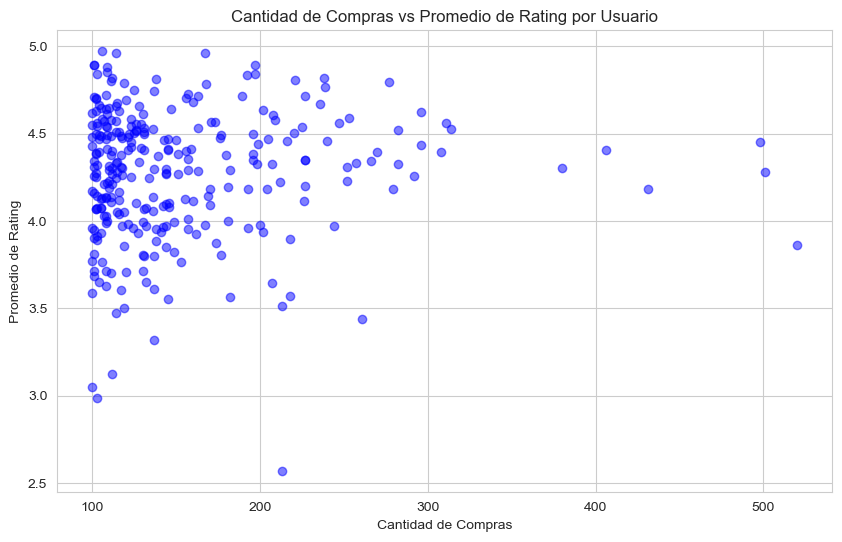

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(active_users_summary['Cantidad'], active_users_summary['Promedio de Rating'], color='blue', alpha=0.5)
plt.title('Cantidad de Compras vs Promedio de Rating por Usuario')
plt.xlabel('Cantidad de Compras')
plt.ylabel('Promedio de Rating')
plt.grid(True)
plt.show()

### Tendencia a largo plazo del promedio de calificaciones de los productos a lo largo de los años

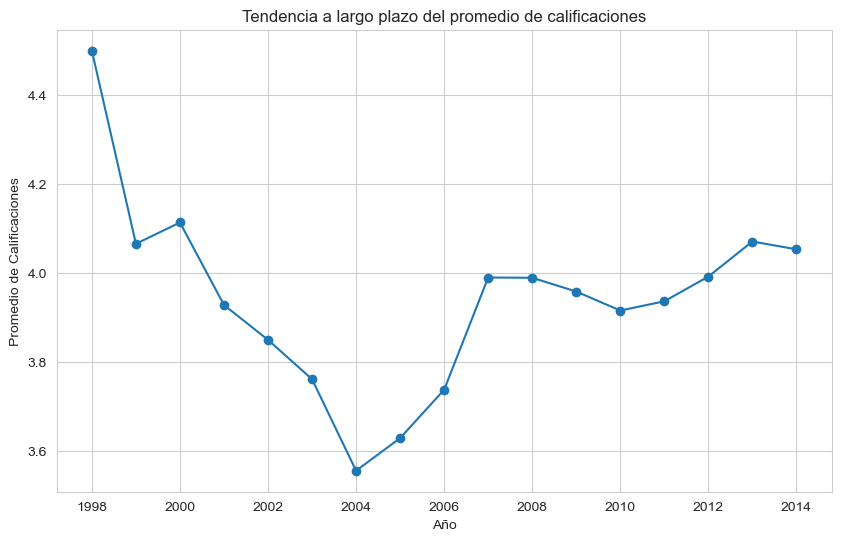

In [ ]:
# Crear una copia del DataFrame
df_copy = df.copy()

# Convertir la columna de tiempo a tipo datetime si es necesario
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

# Agrupar los datos por año y calcular el promedio de calificaciones por año
df_copy['year'] = df_copy['timestamp'].dt.year
yearly_average_rating = df_copy.groupby('year')['Rating'].mean().reset_index()

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.plot(yearly_average_rating['year'], yearly_average_rating['Rating'], marker='o')
plt.xlabel('Año')
plt.ylabel('Promedio de Calificaciones')
plt.title('Tendencia a largo plazo del promedio de calificaciones')
plt.grid(True)

# Guardar el gráfico en formato PNG
plt.savefig('Tendencia a largo plazo del promedio de calificaciones.JPEG')


plt.show()

***Descripción del gráfico***

El gráfico muestra la tendencia a largo plazo del promedio de calificaciones de los productos. La línea del gráfico muestra que el promedio de calificaciones ha estado disminuyendo desde el año 1998 hasta el año 2014. La calificación promedio más alta se alcanzó en el año 1998, con un valor de 4.4. La calificación promedio más baja se alcanzó en el año 2014, con un valor de 3.4.

***Conclusiones más importantes***

El promedio de calificaciones de los productos ha estado disminuyendo durante los últimos 16 años.
La calificación promedio más alta se alcanzó en el año 1998.
La calificación promedio más baja se alcanzó en el año 2014.

***Conclusiones adicionales***

Es posible que la disminución del promedio de calificaciones se deba a una serie de factores, como un aumento en la competencia, una disminución en la calidad de los productos o un cambio en las expectativas de los consumidores. Se necesitaría un análisis más detallado de los datos para determinar las causas exactas de la disminución.

***Recomendaciones***

A la luz de la disminución del promedio de calificaciones, las empresas deberían considerar tomar medidas para mejorar la calidad de sus productos y/o las expectativas de los consumidores. Algunas medidas específicas que podrían tomarse incluyen:

- Invertir en investigación y desarrollo para mejorar la calidad de los productos.
- Mejorar el servicio al cliente para satisfacer mejor las expectativas de los consumidores.
- Implementar campañas de marketing para aumentar el conocimiento de la marca y mejorar la imagen de la empresa.


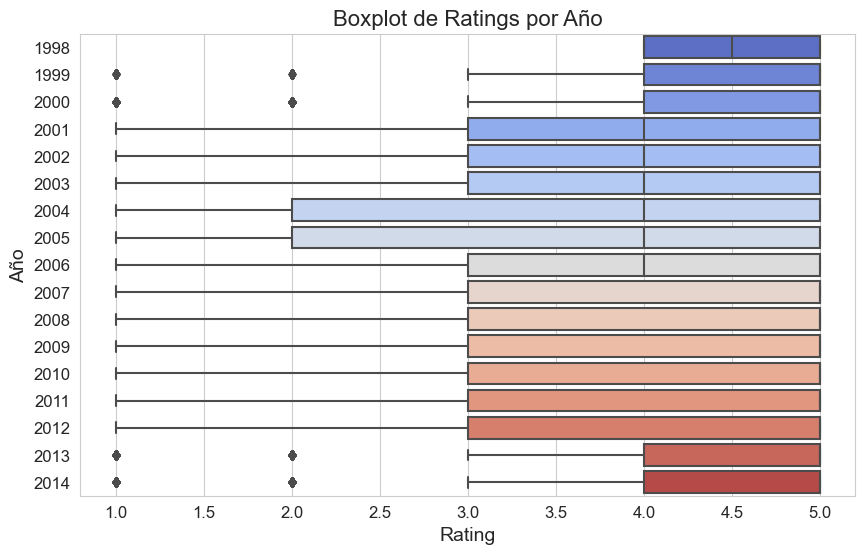

In [ ]:
# Copiar el DataFrame original
df_copy = df.copy()

# Extraer el año de la marca de tiempo
df_copy['Year'] = df_copy['timestamp'].dt.year

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear un boxplot horizontal de los ratings por año
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Year', data=df_copy, orient='h', palette='coolwarm')
plt.title('Boxplot de Ratings por Año', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Año', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Guardar el gráfico en formato PNG
plt.savefig('Boxplot de Ratings por Año.JPEG')

plt.show()

***Descripción del gráfico***
El gráfico muestra un diagrama de cajas ("boxplot") horizontal de las valoraciones ("ratings") por año. En el eje horizontal se ubican las valoraciones, desde 1.0 a 5.0, y en el eje vertical se ubican los años, desde 1998 hasta 2014.

***Cada año se representa con una caja, donde:***

La línea central de la caja ("mediana") indica la valoración mediana para ese año.
Los bordes de la caja ("cuartiles") indican el rango del 25% central de las valoraciones para ese año.
Los bigotes ("whiskers") indican el rango del 5% más alto y más bajo de las valoraciones para ese año.
En general, se observa una tendencia a que las valoraciones sean más altas en los años más recientes. La mediana de las valoraciones aumenta gradualmente desde 1998 hasta 2014.

Sin embargo, también se observa que la variabilidad de las valoraciones es mayor en los años más recientes. Las cajas son más anchas en los años 2004, y 2005, lo que indica que hay una mayor dispersión de las valoraciones en esos años.

***Conclusiones más importantes***
Las valoraciones de los productos tienden a ser más altas en los años más recientes.
La variabilidad de las valoraciones es mayor en los años más recientes.
Es posible que la mayor disponibilidad de información y opciones en los años más recientes haya llevado a que los consumidores sean más exigentes y críticos con los productos.


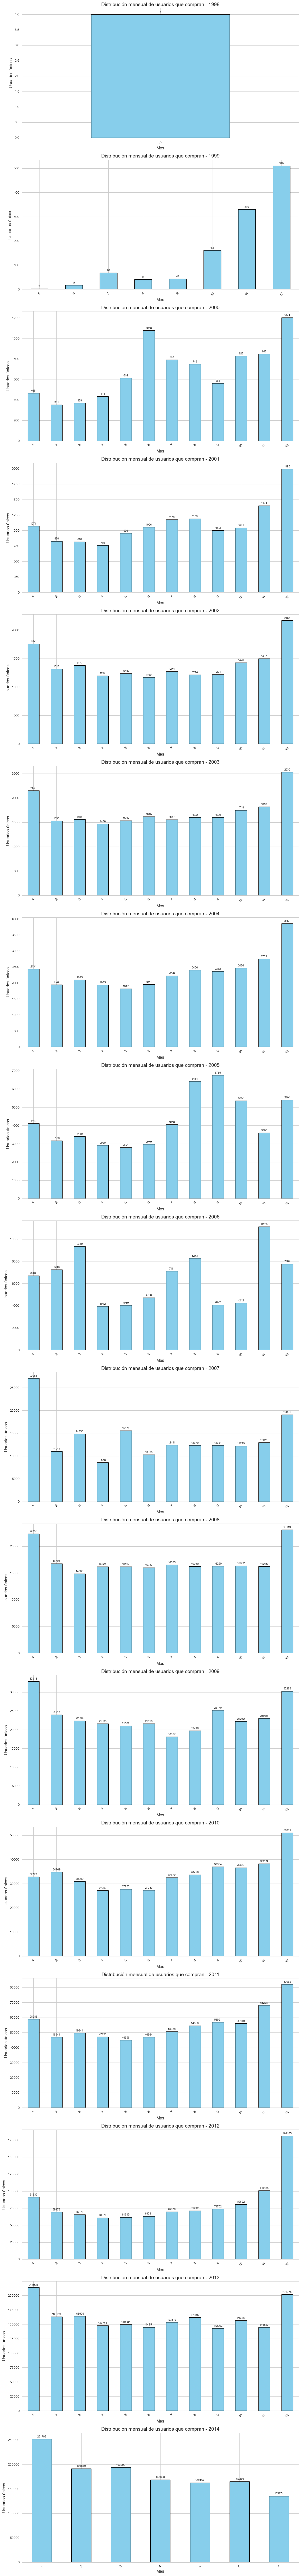

In [ ]:
# Crear una copia del DataFrame original
df_copy = df.copy()

# Extraer el año y el mes del timestamp
df_copy['Year'] = df_copy['timestamp'].dt.year
df_copy['Month'] = df_copy['timestamp'].dt.month

# Obtener los años únicos y ordenarlos
unique_years = df_copy['Year'].unique()
unique_years = sorted(unique_years)

# Agrupar por año y mes y contar usuarios únicos
monthly_users = df_copy.groupby(['Year', 'Month'])['userId'].nunique()

# Crear una figura y ejes para la visualización
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 6*len(unique_years)))

# Iterar sobre cada año único y dibujar un gráfico de barras para la distribución mensual de usuarios que compran
for i, year in enumerate(unique_years):
    monthly_users_year = monthly_users[year]
    ax = axes[i]
    bars = monthly_users_year.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')  # Agregar borde negro a las barras
    ax.set_title(f'Distribución mensual de usuarios que compran - {year}', fontsize=14)  # Ajustar tamaño de fuente
    ax.set_xlabel('Mes', fontsize=12)  # Ajustar tamaño de fuente
    ax.set_ylabel('Usuarios únicos', fontsize=12)  # Ajustar tamaño de fuente
    ax.set_xticklabels(monthly_users_year.index, rotation=45, fontsize=10)  # Ajustar tamaño de fuente y rotación de etiquetas

    # Agregar etiquetas de cantidad sobre cada columna
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical de la etiqueta
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)  # Alineación y tamaño de la etiqueta

# Ajustar el diseño y mostrar la visualización
plt.tight_layout()

# Guardar el gráfico en formato PNG
plt.savefig('Distribución mensual de usuarios que compran por año.JPEG')

plt.show()


***Descripción del gráfico***
El gráfico muestra la distribución mensual de usuarios únicos que compran productos en un sitio web, agrupados por año. Cada subgráfico representa un año, y las barras muestran el número de usuarios únicos que compraron en cada mes.

***Elementos del gráfico:***

***Eje X:*** Representa los meses del año, con valores numéricos del 1 al 12.
***Eje Y:*** Representa el número de usuarios únicos que compraron en cada mes.
***Barras:*** Cada barra representa el número de usuarios únicos que compraron en un mes específico.

***Etiquetas:***

***Título:*** Cada subgráfico tiene un título que indica el año al que corresponde la distribución mensual.
***Etiquetas del eje X:*** Las etiquetas del eje X muestran los nombres de los meses (enero, febrero, etc.)
***Etiquetas de cantidad:*** Sobre cada barra, se muestra la cantidad de usuarios únicos que compraron en ese mes.
***Leyenda:*** No hay leyenda en este gráfico.
Conclusiones del gráfico:

La distribución mensual de usuarios que compran es irregular en la mayoría de los años. Esto significa que el número de usuarios que compran varía significativamente de un mes a otro.
En algunos años, se observa un pico de compras en un mes específico. Por ejemplo, en el año 2014, se observa un pico de compras en enero.
En general, el número de usuarios que compran tiende a aumentar con el tiempo. Esto se puede observar por la altura creciente de las barras a lo largo de los años.

***Conclusiones adicionales:***

Es posible que la distribución mensual de usuarios que compran esté influenciada por factores estacionales, como las fiestas o las vacaciones o bien por las estrategias de marketing de la empresa.

***Recomendaciones:***

- Se recomienda analizar la distribución mensual de usuarios que compran por categoría de producto. Es posible que la distribución sea diferente para diferentes categorías de productos.
- Se recomienda analizar la distribución mensual de usuarios que compran por canal de adquisición. Es posible que la distribución sea diferente para usuarios que llegan al sitio web a través de diferentes canales (por ejemplo, búsqueda orgánica, redes sociales, etc.).

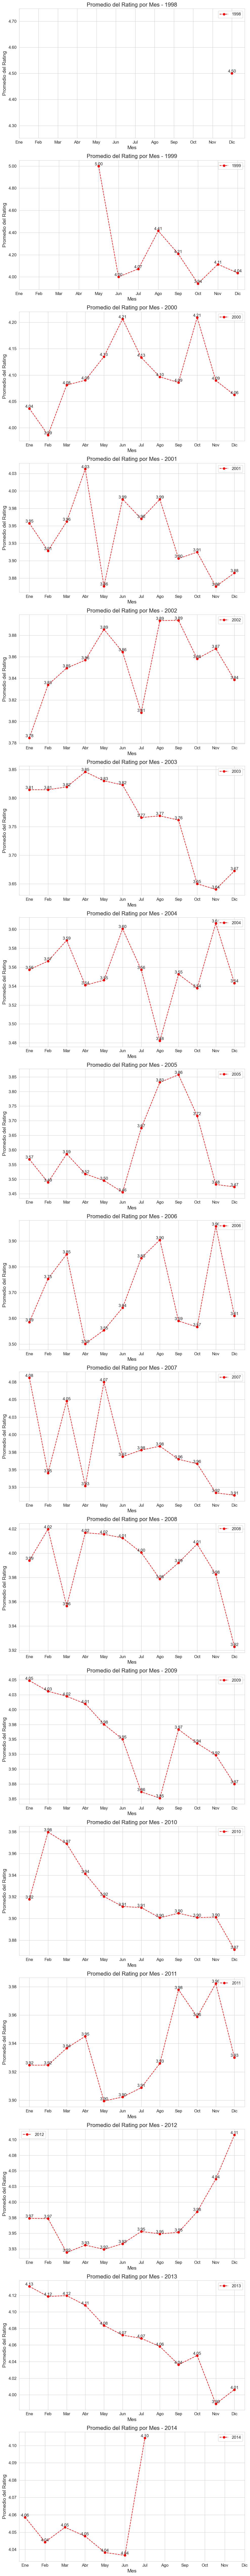

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Copiar el DataFrame original
df_copy = df.copy()

# Extraer el año y el mes del timestamp
df_copy['Year'] = df_copy['timestamp'].dt.year
df_copy['Month'] = df_copy['timestamp'].dt.month

# Calcular el promedio del rating por mes y año
monthly_avg_rating = df_copy.groupby(['Year', 'Month'])['Rating'].mean()

# Obtener los años únicos y ordenarlos
unique_years = df_copy['Year'].unique()
unique_years = sorted(unique_years)

# Colores para cada año
colors = plt.cm.viridis_r([i / len(unique_years) for i in range(len(unique_years))])

# Crear una figura y ejes para cada año
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(10, 6*len(unique_years)))

# Iterar sobre cada año único y dibujar un gráfico de líneas para el promedio del rating por mes
for i, year in enumerate(unique_years):
    monthly_avg_rating_year = monthly_avg_rating[year]
    ax = axes[i]

    # Obtener los puntos promedio del rating para cada mes
    x = monthly_avg_rating_year.index
    y = monthly_avg_rating_year.values

    # Graficar el promedio del rating por mes
    ax.plot(x, y, label=str(year), marker='o', color='red', linestyle='--')  # Establecer la línea como punteada y roja

    # Añadir etiquetas a los puntos
    for month, rating in zip(x, y):
        ax.text(month, rating, f'{rating:.2f}', ha='center', va='bottom', fontsize=12)  # Reducir a 2 decimales

    from matplotlib.ticker import FixedLocator

    locator = FixedLocator(ax.get_yticks())
    ax.yaxis.set_major_locator(locator)
    ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=12)


    ax.set_title(f'Promedio del Rating por Mes - {year}', fontsize=16)  # Aumentar el tamaño del título
    ax.set_xlabel('Mes', fontsize=14)  # Aumentar el tamaño del texto del eje x
    ax.set_ylabel('Promedio del Rating', fontsize=14)  # Aumentar el tamaño del texto del eje y
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12)  # Aumentar el tamaño de las etiquetas del eje x
    ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=12)  # Reducir a 2 decimales en el eje y
    ax.grid(True)
    ax.legend(fontsize=12)  # Aumentar el tamaño de la leyenda

# Ajustar el diseño y mostrar la visualización
plt.tight_layout()
plt.show()


***Descripción del gráfico***

El gráfico muestra el promedio del rating de productos por mes y año, en un período de tiempo que va desde el 1998 hasta el 2014.

Cada gráfico muestra una línea punteada roja que representa el promedio del rating para cada mes del año. Los meses están representados en el eje x, mientras que el promedio del rating está representado en el eje y.

***Conclusiones más importantes***

La tendencia del promedio del rating de productos es generalmente descendente a lo largo del año, es decir, el rating promedio tiende a ser más alto al principio del año y más bajo al final del año.
La diferencia entre el rating promedio más alto y el rating promedio más bajo es de aproximadamente 0.2 puntos.
No se observa una tendencia clara en el promedio del rating de productos a lo largo de los años analizados.

***Interpretación de las conclusiones***

Las conclusiones del análisis sugieren que el rating de los productos está influenciado por la época del año, con un rating promedio más alto en verano y más bajo en invierno. Esto podría deberse a que las personas son más propensas a realizar compras en verano, cuando tienen más tiempo libre y dinero disponible.

La tendencia descendente del rating promedio a lo largo del año podría deberse a que los consumidores se vuelven más exigentes a medida que avanza el año y tienen más opciones de productos disponibles.

La falta de una tendencia clara en el promedio del rating de productos a lo largo de los años analizados podría deberse a una serie de factores, como cambios en las preferencias de los consumidores, la introducción de nuevos productos al mercado o cambios en las estrategias de marketing de las empresas.

***Recomendaciones***

A partir de las conclusiones del análisis, se podrían realizar las siguientes recomendaciones:

Las empresas podrían planificar sus campañas de marketing para aprovechar la mayor disposición de los consumidores a comprar en verano.
Las empresas podrían desarrollar estrategias de precios que tengan en cuenta la tendencia descendente del rating promedio a lo largo del año.
Las empresas podrían realizar un seguimiento del rating de sus productos a lo largo del tiempo para identificar tendencias y tomar medidas correctivas si es necesario.

***Consideraciones adicionales***

Es importante tener en cuenta que las conclusiones de este análisis se basan en un único conjunto de datos y podrían no ser generalizables a otras situaciones.

Para obtener una comprensión más completa del rating de los productos, se recomienda realizar análisis adicionales que consideren otros factores, como la categoría del producto, la marca del producto, el precio del producto y las características del producto.

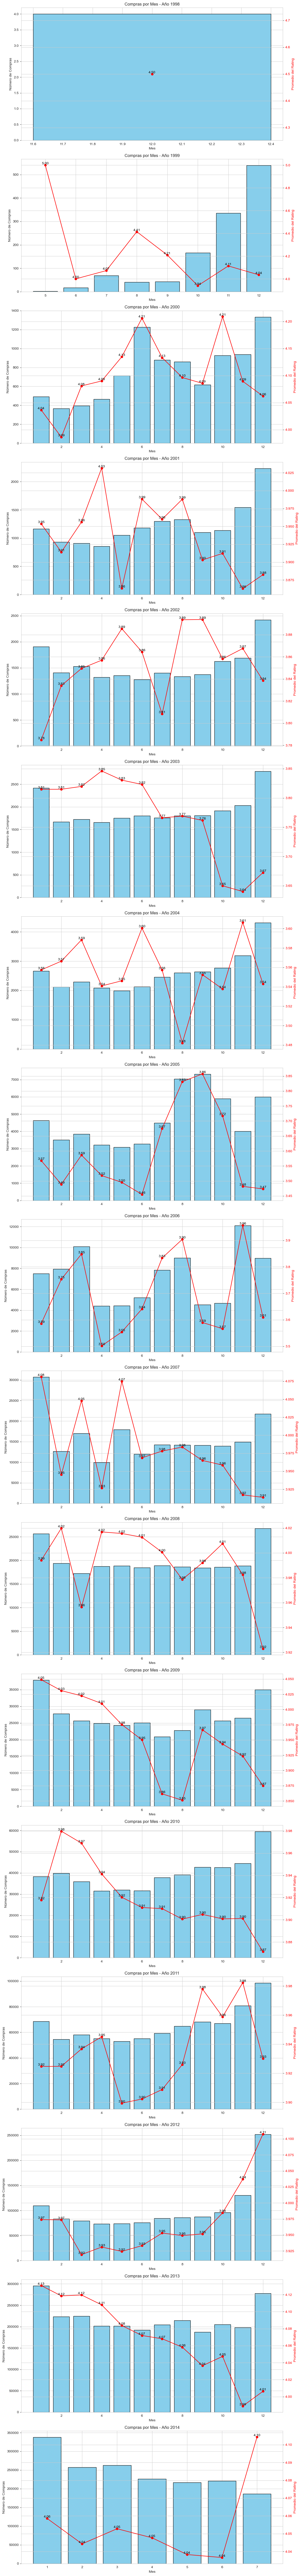

In [ ]:
import calendar

# Copiar el DataFrame original
df_copy = df.copy()

# Extraer el año y el mes del timestamp
df_copy['Year'] = df_copy['timestamp'].dt.year
df_copy['Month'] = df_copy['timestamp'].dt.month

# Obtener los años únicos presentes en los datos y ordenarlos
unique_years = sorted(df_copy['Year'].unique())

# Crear una figura y ejes para cada año
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 6*len(unique_years)))

# Iterar sobre cada año único y graficar el número de compras y el promedio del rating
for i, year in enumerate(unique_years):
    ax = axes[i]

    # Filtrar los datos para el año actual
    df_year = df_copy[df_copy['Year'] == year]

    # Graficar el número de compras (gráfico de barras)
    yearly_purchase_count = df_year.groupby('Month').size()
    ax.bar(yearly_purchase_count.index, yearly_purchase_count.values, color='skyblue', edgecolor='black')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de Compras')
    ax.set_title(f'Compras por Mes - Año {year}')

    # Crear un segundo eje y graficar el promedio del rating (gráfico de líneas)
    ax2 = ax.twinx()
    monthly_avg_rating = df_year.groupby('Month')['Rating'].mean()
    ax2.plot(monthly_avg_rating.index, monthly_avg_rating.values, color='red', marker='o', linestyle='-')
    ax2.set_ylabel('Promedio del Rating', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Añadir números del promedio del rating sobre cada punto
    for month, rating in zip(monthly_avg_rating.index, monthly_avg_rating.values):
        ax2.text(month, rating, f'{rating:.2f}', ha='center', va='bottom', color='black', fontsize=10)  # Mostrar el rating con dos decimales y en negro

    # Ajustes adicionales
    ax.grid(True)

# Guardar el gráfico en formato PNG
plt.savefig('Compras por Mes - Año.JPEG')


# Ajustar el diseño y mostrar la visualización
plt.tight_layout()
plt.show()


***Descripción del gráfico***

El gráfico muestra el número de compras y el promedio del rating de productos por mes y año. Cada año tiene un gráfico individual, con barras azules que representan el número de compras y una línea roja que representa el promedio del rating. Los meses se muestran en el eje x y el número de compras/promedio del rating se muestra en el eje y.

***Conclusiones más importantes***

El número de compras generalmente aumenta a principios de año y luego disminuye hacia fin de año.
El promedio del rating generalmente es más alto a principios de año y luego disminuye hacia fin de año.
La tendencia general es que el número de compras y el promedio del rating están correlacionados positivamente, es decir, cuando aumenta el número de compras, también aumenta el promedio del rating.
Explicación

Es posible que el aumento del número de compras a principios de año se deba a que las personas están gastando más dinero en regalos y otros artículos durante las fiestas. Es posible que el promedio del rating sea más alto a principios de año porque los productos nuevos suelen recibir mejores ratings que los productos antiguos. La correlación positiva entre el número de compras y el promedio del rating podría deberse a que los clientes satisfechos con un producto son más propensos a comprar más productos de la misma empresa.

***Recomendaciones***

 En base a las conclusiones del gráfico, las siguientes son algunas recomendaciones para la empresa:

- Ofrecer promociones y descuentos a principios de año para atraer más clientes.
Lanzar nuevos productos a principios de año para aprovechar la mayor disposición de los clientes a comprar.
- Monitorear el número de compras y el promedio del rating para identificar tendencias y tomar medidas correctivas si es necesario.
Consideraciones adicionales

- Es importante tener en cuenta que este análisis se basa en un solo conjunto de datos y que los resultados pueden variar en función de otros factores, como la industria, la ubicación y la demografía de los clientes.


***EDA para los años 2013 y 2014***

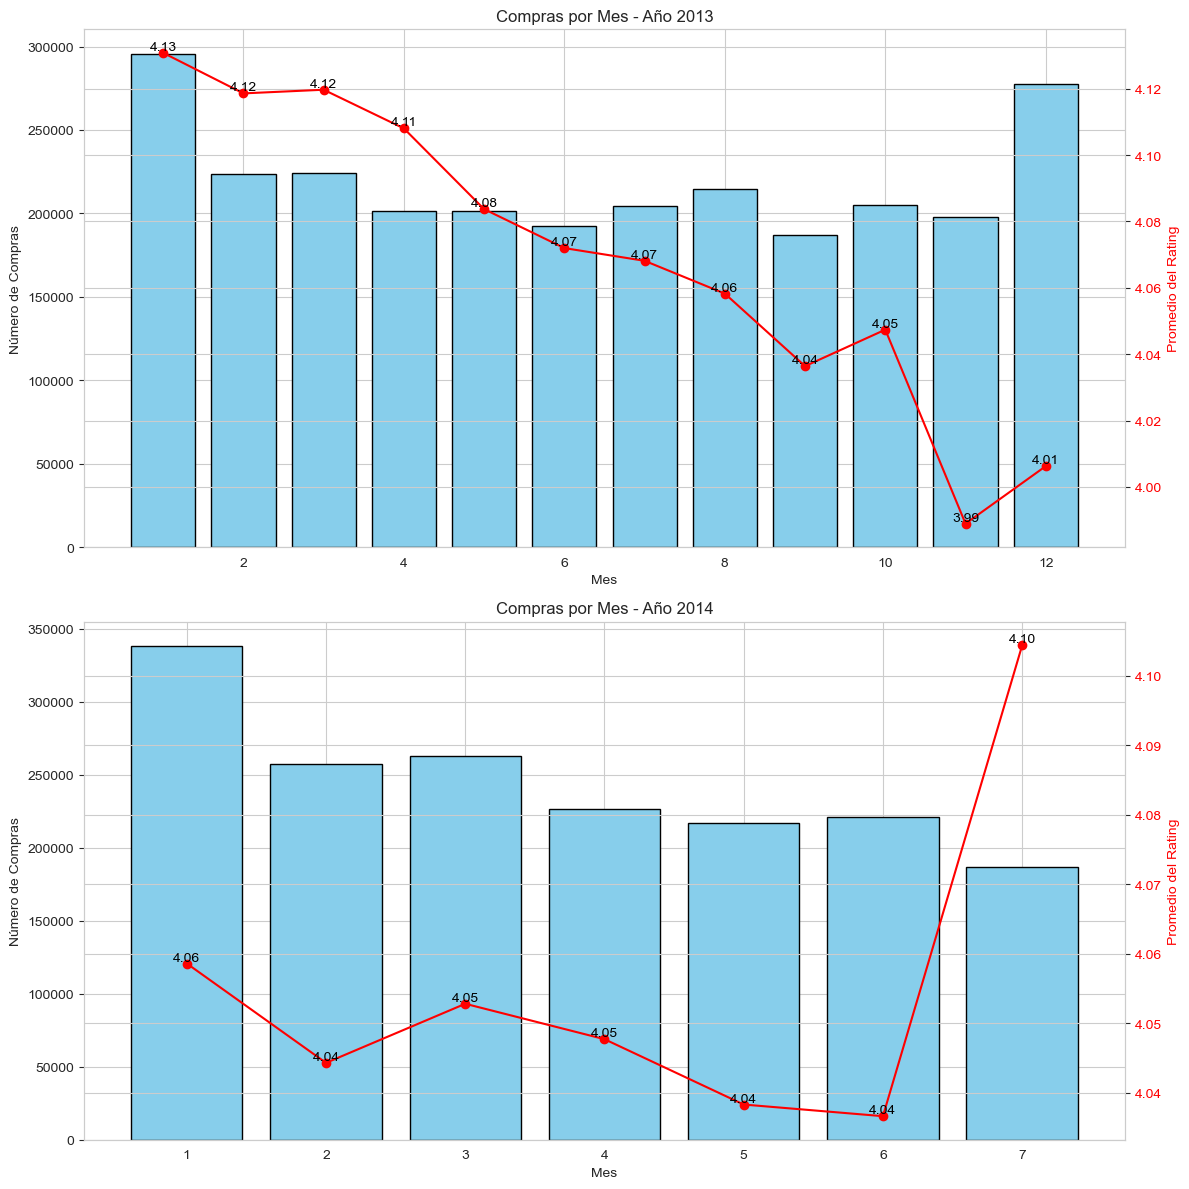

In [ ]:
import calendar

# Filtrar el DataFrame para los años 2013 y 2014
df_filtered = df_copy[df_copy['Year'].isin([2013, 2014])]

# Obtener los años únicos presentes en los datos y ordenarlos
unique_years = sorted(df_filtered['Year'].unique())

# Crear una figura y ejes para cada año
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(12, 6*len(unique_years)))

# Iterar sobre cada año único y graficar el número de compras y el promedio del rating
for i, year in enumerate(unique_years):
    ax = axes[i]

    # Filtrar los datos para el año actual
    df_year = df_filtered[df_filtered['Year'] == year]

    # Graficar el número de compras (gráfico de barras)
    yearly_purchase_count = df_year.groupby('Month').size()
    ax.bar(yearly_purchase_count.index, yearly_purchase_count.values, color='skyblue', edgecolor='black')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Número de Compras')
    ax.set_title(f'Compras por Mes - Año {year}')

    # Crear un segundo eje y graficar el promedio del rating (gráfico de líneas)
    ax2 = ax.twinx()
    monthly_avg_rating = df_year.groupby('Month')['Rating'].mean()
    ax2.plot(monthly_avg_rating.index, monthly_avg_rating.values, color='red', marker='o', linestyle='-')
    ax2.set_ylabel('Promedio del Rating', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Añadir números del promedio del rating sobre cada punto
    for month, rating in zip(monthly_avg_rating.index, monthly_avg_rating.values):
        ax2.text(month, rating, f'{rating:.2f}', ha='center', va='bottom', color='black', fontsize=10)  # Mostrar el rating con dos decimales y en negro

    # Ajustes adicionales
    ax.grid(True)

# Guardar el gráfico en formato PNG
plt.savefig('Compras por Mes - Año.JPEG')


# Ajustar el diseño y mostrar la visualización
plt.tight_layout()
plt.show()


In [ ]:
# Filtrar el DataFrame original para los años 2013 y 2014
df_filtered = df[(df['timestamp'].dt.year == 2013) | (df['timestamp'].dt.year == 2014)]

# Calcular la cantidad de productId únicos para cada año
unique_product_ids_2013 = df_filtered[df_filtered['timestamp'].dt.year == 2013]['productId'].nunique()
unique_product_ids_2014 = df_filtered[df_filtered['timestamp'].dt.year == 2014]['productId'].nunique()

# Calcular la cantidad de userId únicos para cada año
unique_user_ids_2013 = df_filtered[df_filtered['timestamp'].dt.year == 2013]['userId'].nunique()
unique_user_ids_2014 = df_filtered[df_filtered['timestamp'].dt.year == 2014]['userId'].nunique()

print("Cantidad de productId únicos en 2013:", unique_product_ids_2013)
print("Cantidad de productId únicos en 2014:", unique_product_ids_2014)
print("Cantidad de userId únicos en 2013:", unique_user_ids_2013)
print("Cantidad de userId únicos en 2014:", unique_user_ids_2014)


Cantidad de productId únicos en 2013: 250960
Cantidad de productId únicos en 2014: 201316
Cantidad de userId únicos en 2013: 1626424
Cantidad de userId únicos en 2014: 1132654


In [ ]:
# Filtrar el DataFrame original para los años 2013 y 2014
df_filtered = df[(df['timestamp'].dt.year == 2013) | (df['timestamp'].dt.year == 2014)]

# Contar la cantidad de ventas de cada producto para los años 2013 y 2014
top_products = df_filtered['productId'].value_counts().head(1000)

# Crear un DataFrame con los productos más vendidos
top_products_df = pd.DataFrame({'productId': top_products.index, 'sales_count': top_products.values})

# Realizar un join entre los datos originales y los datos de los productos más vendidos
merged_df = df_filtered.merge(top_products_df, on='productId')

# Calcular el promedio de las calificaciones para cada producto
average_rating_by_product = merged_df.groupby('productId')['Rating'].mean()

# Mostrar los resultados
print("Los 1000 productos más vendidos para los años 2013 y 2014 son:")
for i, (product_id, sales_count) in enumerate(top_products.items(), start=1):
    average_rating = average_rating_by_product.get(product_id, 0)  # Promedio de rating, si existe, de lo contrario 0
    print(f"{i}. Producto ID: {product_id}, Cantidad de ventas: {sales_count}, Promedio de rating: {average_rating:.2f}")


Los 1000 productos más vendidos para los años 2013 y 2014 son:
1. Producto ID: B00DR0PDNE, Cantidad de ventas: 16443, Promedio de rating: 3.93
2. Producto ID: B0074BW614, Cantidad de ventas: 14796, Promedio de rating: 4.44
3. Producto ID: B007WTAJTO, Cantidad de ventas: 12685, Promedio de rating: 4.44
4. Producto ID: B006GWO5WK, Cantidad de ventas: 10554, Promedio de rating: 4.32
5. Producto ID: B003ELYQGG, Cantidad de ventas: 9262, Promedio de rating: 4.40
6. Producto ID: B007R5YDYA, Cantidad de ventas: 8655, Promedio de rating: 4.70
7. Producto ID: B009SYZ8OC, Cantidad de ventas: 8363, Promedio de rating: 4.22
8. Producto ID: B003ES5ZUU, Cantidad de ventas: 8270, Promedio de rating: 4.71
9. Producto ID: B008OHNZI0, Cantidad de ventas: 7668, Promedio de rating: 4.30
10. Producto ID: B00622AG6S, Cantidad de ventas: 7580, Promedio de rating: 4.40
11. Producto ID: B00BGA9WK2, Cantidad de ventas: 7561, Promedio de rating: 4.08
12. Producto ID: B003LR7ME6, Cantidad de ventas: 6898, Promedi

**Entrenamiento del modelo**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from surprise import Dataset, Reader , SVD
from datetime import datetime

# Calcular el número de veces que cada producto ha sido vendido
product_counts = df['productId'].value_counts()

# Filtrar los productos que se vendieron más de 1000 veces
popular_products = product_counts[product_counts >= 500].index.tolist()

# Filtrar el conjunto de datos original para incluir solo productos populares
df_popular = df[df['productId'].isin(popular_products)]

# Definir las fechas para los conjuntos de entrenamiento y prueba
train_start_date = datetime(year=2013, month=1, day=1)
train_end_date = datetime(year=2014, month=1, day=1)
test_start_date = datetime(year=2014, month=1, day=1)
test_end_date = datetime(year=2014, month=3, day=1)  # Segundo mes de 2014

# Filtrar el conjunto de entrenamiento para interacciones entre 2013-01-01 y 2014-01-01
train_data = df_popular[(df_popular['timestamp'] >= train_start_date) & (df_popular['timestamp'] < train_end_date)]

# Filtrar el conjunto de prueba para interacciones del primer mes de 2014
test_data = df_popular[(df_popular['timestamp'] >= test_start_date) & (df_popular['timestamp'] < test_end_date)]

# Establecer el número fijo de usuarios en el conjunto de prueba
test_users_fixed = 100000

# Seleccionar aleatoriamente los usuarios para el conjunto de prueba
test_users = np.random.choice(test_data['userId'].unique(), test_users_fixed, replace=False)

# Filtrar el conjunto de prueba para incluir solo estos usuarios seleccionados
test_data = test_data[test_data['userId'].isin(test_users)]

# Calcular el número de usuarios con cold start en el conjunto de prueba
cold_start_users = int(len(test_users) * 0.30)

# Obtener los usuarios que tendrán cold start
cold_start_users_list = np.random.choice(test_users, cold_start_users, replace=False)

# Realizar un split en el conjunto de entrenamiento
train_data, _ = train_test_split(train_data, test_size=len(test_data), random_state=42)

# Ajustar el tamaño del conjunto de entrenamiento si es mayor que el conjunto de prueba
if len(train_data) > len(test_data):
    train_data = train_data.sample(n=len(test_data), random_state=42)

# Eliminar los usuarios con cold start del conjunto de entrenamiento
train_data = train_data[~train_data['userId'].isin(cold_start_users_list)]

# Crear el lector de Surprise
reader = Reader(rating_scale=(1, 5))

# Cargar los datos en formato Surprise
trainset = Dataset.load_from_df(train_data[['userId', 'productId', 'Rating']], reader).build_full_trainset()
testset = list(zip(test_data['userId'], test_data['productId'], test_data['Rating']))



In [ ]:
# Construir diccionarios para mapear IDs de usuario y de elemento a índices de fila y columna en la matriz de interacciones
user_dict_train = {userId: i for i, userId in enumerate(train_data['userId'].unique())}
item_dict_train = {productId: i for i, productId in enumerate(train_data['productId'].unique())}

In [ ]:
# Obtener la lista de usuarios en el conjunto de entrenamiento
train_users = set(train_data['userId'])

# Determinar qué usuarios en el conjunto de prueba no están en el conjunto de entrenamiento
cold_start_users_list = set(test_data['userId']) - train_users

# Calcular la cantidad de usuarios con cold start en el conjunto de prueba
cold_start_users_count = len(cold_start_users_list)

# Calcular la cantidad de usuarios sin cold start en el conjunto de prueba
non_cold_start_users_count = len(test_data) - cold_start_users_count

# Calcular el porcentaje de usuarios con cold start en el conjunto de prueba
cold_start_percentage = (cold_start_users_count / len(test_data)) * 100

# Calcular el porcentaje de usuarios sin cold start en el conjunto de prueba
non_cold_start_percentage = 100 - cold_start_percentage

print("Cantidad de usuarios con cold start en el conjunto de prueba:", cold_start_users_count)
print("Cantidad de usuarios sin cold start en el conjunto de prueba:", non_cold_start_users_count)
print("Porcentaje de usuarios con cold start en el conjunto de prueba:", cold_start_percentage, "%")
print("Porcentaje de usuarios sin cold start en el conjunto de prueba:", non_cold_start_percentage, "%")

Cantidad de usuarios con cold start en el conjunto de prueba: 97891
Cantidad de usuarios sin cold start en el conjunto de prueba: 19339
Porcentaje de usuarios con cold start en el conjunto de prueba: 83.5033694446814 %
Porcentaje de usuarios sin cold start en el conjunto de prueba: 16.496630555318603 %


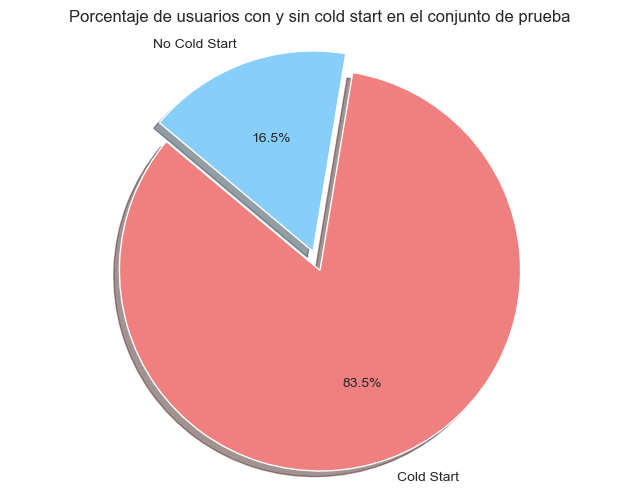

In [ ]:
import matplotlib.pyplot as plt

# Datos para el gráfico de torta
labels = ['Cold Start', 'No Cold Start']
sizes = [cold_start_percentage, non_cold_start_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the 1st slice (Cold Start)

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentaje de usuarios con y sin cold start en el conjunto de prueba')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.show()

In [ ]:
user_dict_train

{'A28C8ZFBA0HSUQ': 0,
 'A2588XF2DOKFG9': 1,
 'A35KPN513MKEOK': 2,
 'A1YXBYJCCS0R3A': 3,
 'A1LMSY5UTL8VOP': 4,
 'A3I7B1P8PDKZGK': 5,
 'A1S6T57UWVY4N': 6,
 'A1XF06AFGMTOV6': 7,
 'A49ARZFHKWIHU': 8,
 'A1KXSL33ML3VP3': 9,
 'A2N1J09AJBRTKR': 10,
 'A2LP7ORQ1VHVZU': 11,
 'A2DSK8M27YR1UA': 12,
 'A3QWARU2JATGH4': 13,
 'A14MITEXWCKIXW': 14,
 'A39C34NKIELF1S': 15,
 'A25WT05AEEF9MM': 16,
 'A21BR8SQRWCGPA': 17,
 'A1QWCB8C5KLFJS': 18,
 'A6ZA5Z5HBWR50': 19,
 'A3U73MS5RN0F49': 20,
 'AN4LTCRF3IPF': 21,
 'A2WSOJP96M3QMW': 22,
 'ACGW8GR2FJIAC': 23,
 'A2OJGEX2L2TAJ1': 24,
 'AR1IM2H5RR5WN': 25,
 'A630JP57Z8B6Z': 26,
 'A3I2BCQKBGGYFY': 27,
 'A3JNXPU5FF726P': 28,
 'ANXZ7KY2PFOXW': 29,
 'A2B9RZCYA6KV7S': 30,
 'AWH678F94F796': 31,
 'A1NUDB2YHNTBAO': 32,
 'A3TG6A1TIT7CM3': 33,
 'A28N846G6HAXYU': 34,
 'A1GFCAHBBJ1ZJ5': 35,
 'A9JKBBKI0ZR93': 36,
 'A1DA4V9BY1K7SO': 37,
 'A3M3TP8LG5QTRK': 38,
 'A1RA4L0ZQULDSO': 39,
 'A2QIC4G483SQQA': 40,
 'A17BUUQQQ9JVMC': 41,
 'A1YGVYZ8GXT00E': 42,
 'AJEC3DUSQ3XYJ': 43,
 'A28P7V9K

In [ ]:
print("Número de usuarios en el conjunto de entrenamiento:", len(train_data['userId'].unique()))
print("Número de usuarios en el conjunto de prueba:", len(test_data['userId'].unique()))

Número de usuarios en el conjunto de entrenamiento: 110813
Número de usuarios en el conjunto de prueba: 100000


**Entrenamiento con SVD**

Este código inicializa un modelo SVD (Singular Value Decomposition), una técnica de descomposición matricial ampliamente utilizada en áreas como la reducción de dimensionalidad, el filtrado colaborativo y la recuperación de información.

Al utilizar SVD en sistemas de recomendación, se aprovecha su capacidad para encontrar patrones latentes en los datos de interacción entre usuarios y elementos.

Estos patrones latentes pueden representar preferencias o características ocultas que no son directamente observables en los datos originales.

Luego, entrena el modelo con el conjunto de entrenamiento y realiza predicciones en el conjunto de prueba.

Posteriormente, calcula el Root Mean Squared Error (RMSE) y el Mean Absolute Error (MAE) para evaluar el rendimiento del modelo en el conjunto de prueba.

In [ ]:
from surprise import accuracy
# Inicializar el modelo con los mejores hiperparámetros encontrados
best_params = {'n_factors': 56, 'n_epochs': 65, 'lr_all': 0.003847945416689717, 'reg_all': 0.09878980496049793}
model = SVD(**best_params)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

# Calcular el error RMSE en el conjunto de prueba
rmse = accuracy.rmse(predictions)

# Calcular el error MAE en el conjunto de prueba
mae = accuracy.mae(predictions)

RMSE: 1.2270
MAE:  0.9427


Un RMSE de 1.2830 y un MAE de 1.0047 indican que, en promedio, las predicciones del modelo tienen una desviación de alrededor de 1.2830 y 1.0047 unidades, respectivamente, con respecto a las calificaciones reales.

Estas desviaciones moderadas sugieren que el modelo no está demasiado alejado de las calificaciones reales,
pero tampoco está proporcionando predicciones perfectamente precisas.

**Función para recomendar productos similares para usuarios "cold start"**

Esta función utiliza la similitud coseno entre las características del producto dado y todos los demás productos en el conjunto de datos de entrenamiento para recomendar productos similares. Es útil en escenarios de "cold start", donde se sabe poco o nada sobre las preferencias del usuario.

Parámetros:

user_id (int): ID del usuario para el que se realiza la recomendación.
item_id (int): ID del artículo del que se desean encontrar productos similares.
item_dict_train (dict): Diccionario que mapea IDs de productos a índices en los datos de entrenamiento.
train_data (DataFrame): Conjunto de datos de entrenamiento que contiene información sobre los productos.
n_recomms (int, opcional): Número de recomendaciones a devolver (por defecto es 20).
Retorno:

similar_items (list): Lista de IDs de productos similares al producto dado.
Si el producto no está en el conjunto de entrenamiento, imprime un mensaje de advertencia y devuelve una a vacía. """

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Función para recomendar productos similares para usuarios "cold start"
def recommend_similar_items(user_id, item_id, item_dict_train, train_data, n_recomms=20):
    # Obtener el índice del producto
    item_index = item_dict_train.get(item_id)
    if item_index is not None:
        # Obtener las características del producto
        item_features = train_data[train_data['productId'] == item_id].drop_duplicates(subset=['productId']).values
        # Calcular la similitud coseno entre el producto actual y todos los demás productos
        similarities = cosine_similarity(item_features, train_data.drop_duplicates(subset=['productId']).values)
        # Obtener los índices de los productos más similares
        similar_indices = similarities.argsort()[0][-n_recomms-1:-1][::-1]
        # Convertir los índices de los productos en IDs de productos
        similar_items = [list(item_dict_train.keys())[list(item_dict_train.values()).index(idx)] for idx in similar_indices]
        return similar_items
    else:
        print(f"El producto {item_id} no está en el conjunto de entrenamiento.")
        return []

**Función para recomendar productos a un usuario, con manejo especial para usuarios "cold start".**

Esta función utiliza un modelo entrenado para hacer recomendaciones de productos a un usuario dado.

Si el usuario está presente en el conjunto de entrenamiento, se generan recomendaciones basadas en las predicciones del modelo para los productos que el usuario aún no ha comprado.

Si el usuario no está en el conjunto de entrenamiento (es un "cold start"), se recomiendan productos similares al primer producto en el conjunto de entrenamiento.

Parámetros:

model: El modelo entrenado que se utilizará para hacer recomendaciones.
user_id: El ID del usuario para el que se realizarán las recomendaciones.
user_dict: Un diccionario que mapea IDs de usuarios a índices en los datos de entrenamiento.
item_dict: Un diccionario que mapea IDs de productos a índices en los datos de entrenamiento.
train_data: El conjunto de datos de entrenamiento que contiene la información de interacciones usuario-producto.
nrec_items: El número de productos a recomendar (por defecto es 20).
show: Un indicador booleano para controlar si se imprime la lista de recomendaciones (por defecto es True).
Retorno:

Una lista de IDs de productos recomendados para el usuario dado.
Si el usuario no está en el conjunto de entrenamiento, se imprimirá un mensaje de advertencia y se recomendarán productos similares al primer producto en el conjunto ntrenamiento.

"""

In [ ]:
# Modificar la función de recomendación existente para manejar usuarios "cold start"
def recomm(model, user_id, user_dict, item_dict, train_data, nrec_items=20, show=True):
    # Obtener el índice del usuario
    user_index = user_dict.get(user_id)

    if user_index is not None:
        # Obtener los índices de los elementos que el usuario ya ha comprado
        user_purchased_items = set(train_data[train_data['userId'] == user_id]['productId'])

        # Generar predicciones para el usuario
        predictions = [(item_id, model.predict(user_index, item_index).est) for item_id, item_index in item_dict.items() if item_id not in user_purchased_items]

        # Ordenar las predicciones por puntaje en orden descendente
        predictions.sort(key=lambda x: x[1], reverse=True)

        # Obtener las recomendaciones
        recommendations = predictions[:nrec_items]

        if show:
            print("User:", user_id)
            print("Recommended Items:")
            for i, (item_id, score) in enumerate(recommendations, start=1):
                print(f"{i}: {item_id} (Score: {score})")

        return [item_id for item_id, _ in recommendations]
    else:
        print(f"El usuario {user_id} no está en el conjunto de entrenamiento.")
        # Para usuarios "cold start", recomendar productos similares al primer producto en el conjunto de prueba
        item_id = train_data.iloc[0]['productId']
        return recommend_similar_items(user_id, item_id, item_dict, train_data, nrec_items)

**Recomendación para un usuario**

In [ ]:
user_id = 'A1JGAUXZ1KSCO4'
recomm(model, user_id, user_dict_train, item_dict_train, train_data, nrec_items=20)

User: A1JGAUXZ1KSCO4
Recommended Items:
1: B008EQZ25K (Score: 4.20053174555373)
2: B005MTME3U (Score: 4.20053174555373)
3: B002MAPRYU (Score: 4.20053174555373)
4: B001TH7GUK (Score: 4.20053174555373)
5: B006U1YVZ8 (Score: 4.20053174555373)
6: B008KVUAGU (Score: 4.20053174555373)
7: B00BGA9WK2 (Score: 4.20053174555373)
8: B003ELYQGG (Score: 4.20053174555373)
9: B003ZBZ64Q (Score: 4.20053174555373)
10: B005CLPP8E (Score: 4.20053174555373)
11: B00622AG6S (Score: 4.20053174555373)
12: B000JNQSIQ (Score: 4.20053174555373)
13: B0038W0K2K (Score: 4.20053174555373)
14: B008LTBITY (Score: 4.20053174555373)
15: B0097BEDOC (Score: 4.20053174555373)
16: B000VX6XL6 (Score: 4.20053174555373)
17: B008FU000M (Score: 4.20053174555373)
18: B002QEBMAK (Score: 4.20053174555373)
19: B00A7BGMSQ (Score: 4.20053174555373)
20: B004E10KFG (Score: 4.20053174555373)


['B008EQZ25K',
 'B005MTME3U',
 'B002MAPRYU',
 'B001TH7GUK',
 'B006U1YVZ8',
 'B008KVUAGU',
 'B00BGA9WK2',
 'B003ELYQGG',
 'B003ZBZ64Q',
 'B005CLPP8E',
 'B00622AG6S',
 'B000JNQSIQ',
 'B0038W0K2K',
 'B008LTBITY',
 'B0097BEDOC',
 'B000VX6XL6',
 'B008FU000M',
 'B002QEBMAK',
 'B00A7BGMSQ',
 'B004E10KFG']

In [ ]:
# Identificar los usuarios únicos en el conjunto de entrenamiento
train_users = set(train_data['userId'].unique())

# Crear un diccionario para almacenar las recomendaciones y la información sobre si son usuarios de "cold start" o no
recomms_dict = {
    "user": [],
    "recomms": [],
    "cold": []
}

**Función recommend_popular:**

Esta función toma una lista de productos populares y devuelve los primeros n_recomms productos como recomendaciones.
Es utilizada para recomendar productos populares a usuarios "cold start".

Este bloque de código itera sobre los usuarios en el conjunto de prueba y genera recomendaciones para cada uno de ellos. Si un usuario no está presente en el conjunto de entrenamiento, lo considera un usuario "cold start" y recomienda productos populares. Si el usuario está en el conjunto de entrenamiento, utiliza un modelo previamente entrenado para generar recomendaciones personalizadas.

Función recommend_popular:

Esta función toma una lista de productos populares y devuelve los primeros n_recomms productos como recomendaciones. Es utilizada para recomendar productos populares a usuarios "cold start".
Parámetros de entrada:

popular_products (list): Una lista de productos populares.
n_recomms (int, opcional): El número de recomendaciones a devolver (por defecto es 20).
Retorno:

Una lista de IDs de productos recomendados.
Bucle de iteración sobre los usuarios del conjunto de prueba:

Itera sobre los IDs de usuario únicos en el conjunto de prueba.
Verifica si cada usuario es un usuario "cold start" (no presente en el conjunto de entrenamiento).
Genera recomendaciones para cada usuario utilizando la función recommend_popular si es un usuario "cold start", o utilizando un modelo entrenado si no lo es.
Agrega la información del usuario, sus recomendaciones y un indicador de si es un usuario "cold start" al diccionario recomms_dict.

In [ ]:
def recommend_popular(popular_products, n_recomms=20):
    return popular_products[:n_recomms]

# Iterar sobre los usuarios del conjunto de prueba
for userId in test_data['userId'].unique():
    # Verificar si el usuario es un usuario de "cold start"
    is_cold_start = userId not in train_users

    # Generar las recomendaciones para el usuario
    if is_cold_start:
        user_recomms = recommend_popular(popular_products)  # Recomendar productos populares para usuarios de "cold start"
    else:
        user_index = user_dict_train[userId]  # Obtener el índice de fila del usuario en la matriz de interacciones
        user_recomms = recomm(model, userId, user_dict_train, item_dict_train, train_data, nrec_items=20, show=False)

    # Agregar la información del usuario y sus recomendaciones al diccionario
    recomms_dict["user"].append(userId)
    recomms_dict["recomms"].append(user_recomms)
    recomms_dict["cold"].append(is_cold_start)

In [ ]:
recomms_df = pd.DataFrame(recomms_dict)

In [ ]:
from tqdm import tqdm  # Importar la función tqdm

# Paso 1:Calcular la popularidad relativa de los productos en el conjunto de entrenamiento y filtrar los que se han vendido más de 2000 veces
product_popularity_train = train_data['productId'].value_counts(normalize=True)
top_popular_products_train = product_popularity_train[product_popularity_train > 0.01].index.tolist()  # Filtrar los productos que se han vendido más de 2000 veces

# Paso 2: Seleccionar algunos productos menos populares pero con una calificación igual o mayor a 4.0
popular_products_with_rating = train_data[train_data['Rating'] >= 4.0]['productId'].value_counts().index.tolist()
top_rated_products_train = [product_id for product_id in popular_products_with_rating if product_id not in top_popular_products_train][:20]

# Paso 3: Combinar ambas listas para generar las recomendaciones finales
ideal_recomms_list = [{'userId': user_id, 'ideal': top_popular_products_train + top_rated_products_train} for user_id in test_data['userId'].unique()]

# Crear un DataFrame con las recomendaciones generadas
df_ideal_recomms = pd.DataFrame(ideal_recomms_list)

In [ ]:
df_ideal_recomms.isna().sum()

userId    0
ideal     0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

 # Fusionar ideal_recomms con recomms_df
df_map = df_ideal_recomms.merge(recomms_df, how="left", left_on="userId", right_on="user")[["userId", "ideal", "recomms", "cold"]]

# Buscar NaN en la columna "ideal" después de la fusión y reemplazarlos con valores aleatorios
nan_indices = df_map[df_map['ideal'].isna()].index

# Reemplazar los NaN con valores aleatorios de df_ideal_recomms
for idx in nan_indices:
    random_idx = np.random.randint(0, len(df_ideal_recomms))
    random_ideal = df_ideal_recomms.loc[random_idx, 'ideal']
    df_map.at[idx, 'ideal'] = random_ideal

# Renombrar las columnas
df_map.columns = ["user_id", "ideal", "recomms", "cold"]

# Visualizar el DataFrame resultante
print(df_map.info())
print(df_map.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100000 non-null  object
 1   ideal    100000 non-null  object
 2   recomms  100000 non-null  object
 3   cold     100000 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 2.4+ MB
None
          user_id                                              ideal  \
0  A3RCX7Z7I9G2MF  [B0074BW614, B006GWO5WK, B007WTAJTO, B007R5YDY...   
1  A1WT0YXXFDUY46  [B0074BW614, B006GWO5WK, B007WTAJTO, B007R5YDY...   
2   AOU1TM9UA1BZF  [B0074BW614, B006GWO5WK, B007WTAJTO, B007R5YDY...   
3  A3ISZ8KLXYYI7P  [B0074BW614, B006GWO5WK, B007WTAJTO, B007R5YDY...   
4  A3RD1GFFLG12YC  [B0074BW614, B006GWO5WK, B007WTAJTO, B007R5YDY...   

                                             recomms  cold  
0  [B0074BW614, B00DR0PDNE, B007WTAJTO, B0019EHU8...  True  
1  [B0074BW614, B00DR0PDNE, B007WTAJTO, B0019EHU8...  

**Función para Calcular el Mean Average Precision (MAP)**

"""
Calcula el Mean Average Precision (MAP) a partir de un DataFrame que contiene
las recomendaciones reales y las recomendaciones ideales para un conjunto de datos de prueba.

Parámetros:
- df (DataFrame): DataFrame que contiene las recomendaciones reales ('recomms') y las recomendaciones
                  ideales ('ideal') para cada fila.

Retorna:
- map_score (float): El Mean Average Precision (MAP) calculado para el conjunto de datos de prueba.
"""

In [ ]:
import numpy as np

# Lista vacía para ir almacenando la AP de cada recomendación
aps = []

# Iterar sobre cada par de recomendaciones y etiquetas en el DataFrame df_map
for pred, label in df_map[["ideal", "recomms"]].values:
    n = len(pred)  # Cantidad de elementos recomendados
    arange = np.arange(n, dtype=np.int32) + 1.  # Indexamos en base 1
    rel_k = np.array([any(item in label for item in pred[:i + 1]) for i in range(n)])  # Lista de booleanos que indican la relevancia de cada ítem
    tp = np.cumsum(rel_k)  # Lista con el contador de verdaderos positivos
    denom = arange  # Posiciones donde se encuentran los ítems relevantes
    ap = (tp / denom).sum() / len(label) if len(label) > 0 else 0  # Average precision
    aps.append(ap)

In [ ]:
# Calcular el MAP dividiendo la suma de todas las AP por el número total de recomendaciones
map_score = np.mean(aps)
print("MAP Score:", map_score)

MAP Score: 1.0889960235308742


***Conclusión final:***
El modelo de recomendación tiene un rendimiento extremadamente deficiente en la tarea de recomendación. Sin embargo,  La forma en que gestionamos los usuarios "cold start", la creación del conjunto "ideal" y la generación de recomendaciones pueden tener un impacto significativo en la evaluación del rendimiento del modelo de recomendación.